# Finding The Best e-Learning Market Using Coders Learning Behaviour.

## Introduction:
We are an e-learing platform mainly focused on web and mobile development, we also cover other domains such as game development and data science. Our goal is to find the best markets to advertise our product in. To answer this question, we are going yo be exploring data from a survey organised by feeCodeCamp in 2017. FreeCodeCamp is a free e-learning plafrom that offers courses on web devlopment. Because they run a popular medium publication with over 400,000 followers, the survey attracted new coders with varying interests. This makes the data ideal for our analysis.

## Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
pd.options.display.max_columns = 150

In [3]:
fcc_survey.info() # gives general information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

For this analysis we have decided to go with ready made data instead of organising a survey because: one it is cheaper to work with ready made data than to organise a survey and two, the data we are working with is representative of the population we want to sample and so this data is perfect for our analysis. The data we are using is a survey on coders who haven't been coding for more than 5 years and it gives insight on how people are learning to code. You can download the data from their github repository <a href='https://github.com/freeCodeCamp/2017-new-coder-survey'>here</a>

## Confirming The Representativeness Of The Data

In [5]:
fcc_survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                      11.770595
  Front-End Web Developer                                                                                                                                                                                                      6.435927
  Data Scientist                                                                                                                                                                                                               2.173913
Back-End Web Developer                                                                                                                                                                                                         2.030892
  Mobile Developer                                                      

Above, we can see that people who took the survey are interested in more than just one Tech role and also that the roles of interests is representative of our population. To get a better view on how much the sample data is representative of our population, we are going to plot the percentages of some of the individual roles.

In [6]:
job_interest = fcc_survey['JobRoleInterest'].dropna() #removes all null values 
job_interest = job_interest.str.split(',').str[0] #returns only the first job interest for respondents with multiple interest
job_interest_frequency = job_interest.value_counts(normalize=True).head(20)*100 #returns the percentage of the top 20 job interests.
job_interest_frequency

Full-Stack Web Developer        24.427918
  Front-End Web Developer       17.820366
Back-End Web Developer          11.084096
  Mobile Developer               8.152174
  Data Scientist                 7.479977
Game Developer                   6.664760
  User Experience Designer       5.592105
Information Security             4.862700
Data Engineer                    4.347826
  DevOps / SysAdmin              3.318078
  Product Manager                3.060641
  Quality Assurance Engineer     1.558924
Software Engineer                0.071510
Software Developer               0.057208
Not sure yet                     0.028604
Unsure                           0.028604
Artificial Intelligence          0.028604
Not sure                         0.028604
undecided                        0.028604
Document Controller              0.014302
Name: JobRoleInterest, dtype: float64

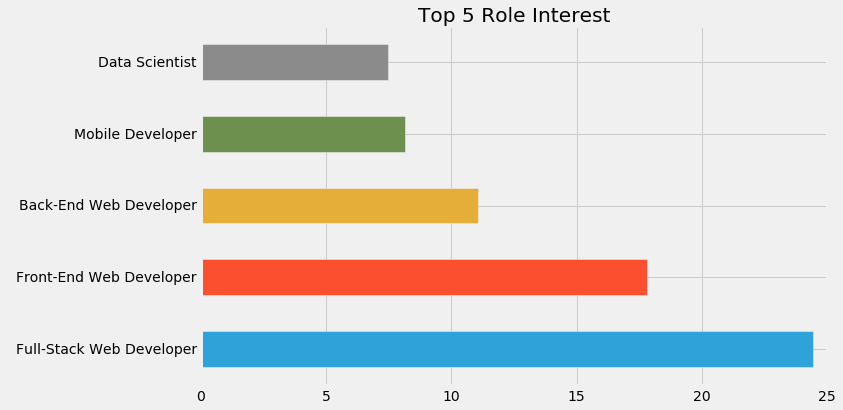

In [7]:
style.use('fivethirtyeight')
job_interest_frequency.head().plot.barh(width=0.5, figsize=(10, 6))
plt.title('Top 5 Role Interest')
plt.show()

By now, it is quite obvious that our sample is very represnetative of our population of interest. The top 5 roles people were interested in were full-stack web development, front-end web development, back-end web development, mobie development and data science. Other roles included were  game development, user experience designer, information security, etc.

## Exploring The Best Countries To Advertise In.
Our dataset has two columns for countries. The `CountryCitizen` column which describes the country the particpant was born in and the `CountryLive` column which describes the country the participant lives in. Since we are only interested in where the participants currently live, the `CountryLive` column is what will be used for this analysis. We are going to be dropping rows were participants didn't respond to what role they were interested in to make sure we are working with a representative sample.

In [8]:
filt = fcc_survey['JobRoleInterest'].notnull() # returns true for rows where JobRoleInterest is not null
absolute_frequency = fcc_survey[filt]['CountryLive'].value_counts()

percentage = fcc_survey[filt]['CountryLive'].value_counts(normalize=True).round(4)*100

country_frequency = pd.DataFrame({'Absolute_frequency': absolute_frequency,
                                 'Percentage': percentage})
country_frequency

,Absolute_frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


45% of new coders live in the US and about 7% in india making them potentially our two biggest markets. But it isn't just enough to know the countries with the most new coders, we need to go more in depth before making any decision. We can do this by figuring out how much money people are willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Exploring How Much Participants Are Willing To Pay for Learning.
The `MoneyForLEarning` column describes how much in american dollars each participant has spent on learning since they started coding until the time they completed the survey. Our company sells subscriptions at a price of $59 per month and for this reason we are interested in finding out how much money each student spends per month. 
To figure out how much money each participant paid per month, we are going to be dividing the `MoneyForLearning` column by the `MonthsProgramming` column.

We will be narrowing down our analysis to the top 5 English speaking countries: The Us, India, United Kingdom, Canada, Australia. The reason for this are:

1. These are the countries with the highest absolute frquencies in our sample which means we have a decent amount of data for each.
2. Our courses are offered only in English and so it makes sense to target our ad in countries with mainly english speakers.


In [9]:
fcc_survey['MonthsProgramming'].value_counts()

1.0      1697
12.0     1497
2.0      1338
3.0      1333
6.0      1330
24.0     1191
36.0      863
4.0       732
5.0       621
0.0       578
48.0      520
18.0      465
8.0       451
60.0      380
10.0      357
30.0      312
7.0       274
20.0      272
15.0      241
9.0       231
40.0      190
14.0      184
16.0      159
50.0      143
120.0     135
72.0      117
13.0      108
11.0       81
26.0       78
84.0       59
         ... 
89.0        1
336.0       1
276.0       1
73.0        1
572.0       1
408.0       1
113.0       1
720.0       1
370.0       1
95.0        1
171.0       1
97.0        1
83.0        1
130.0       1
202.0       1
195.0       1
103.0       1
87.0        1
107.0       1
99.0        1
61.0        1
94.0        1
244.0       1
312.0       1
123.0       1
205.0       1
432.0       1
450.0       1
127.0       1
220.0       1
Name: MonthsProgramming, Length: 154, dtype: int64

We can see some of the values in our `MonthProgramming` column is 0. This might be the response from particpants who just started learning to code when they took the survey. To avoid dividing by 0, we are going to replace all the values of 0 with 1. 

In [10]:
fcc_survey['MonthsProgramming'].replace(0, 1, inplace=True) #replace all values of 0 with 1

In [11]:
fcc_survey['money_per_month'] = fcc_survey['MoneyForLearning']/fcc_survey['MonthsProgramming']

In [12]:
fcc_survey['money_per_month'].isnull().value_counts()

False    16180
True      1995
Name: money_per_month, dtype: int64

In [13]:
fcc_survey.dropna(subset=['CountryLive', 'money_per_month', 'JobRoleInterest'], inplace=True)

In [14]:
#Extracting the mean monthly amount paid in each country
country_grp = fcc_survey.groupby('CountryLive')
country_mean_amount = pd.DataFrame({'mean_amount':country_grp['money_per_month'].mean()}).reset_index()

#getting our country of interest
interest_countries = country_mean_amount[(country_mean_amount['CountryLive'] == 'United States of America')
                                         | (country_mean_amount['CountryLive'] == 'India')
                                         | (country_mean_amount['CountryLive'] == 'United Kingdom')
                                         | (country_mean_amount['CountryLive'] == 'Canada')
                                         | (country_mean_amount['CountryLive'] == 'Australia')]

In [15]:
interest_countries.sort_values('mean_amount', ascending=False)

,CountryLive,mean_amount
6,Australia,419.268452
122,United States of America,227.997996
52,India,135.100982
19,Canada,113.510961
121,United Kingdom,45.534443


Our result shows that people in Australia spend the most money per month on average. However, the values for Canada and the United Kingdom are relatively low compared to the value for India. If we consider a few socio-economical metrics like GDP per capita, we would expect people in the United Kingdom and Canada to on average spend more than people in India.
This might be because we don't have representative data for the United Kingdom, Canada, and India or we have some outliers making the mean for India too big or the mean for Canada and the United Kingdom too low.

## Checking For Outlier Data

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



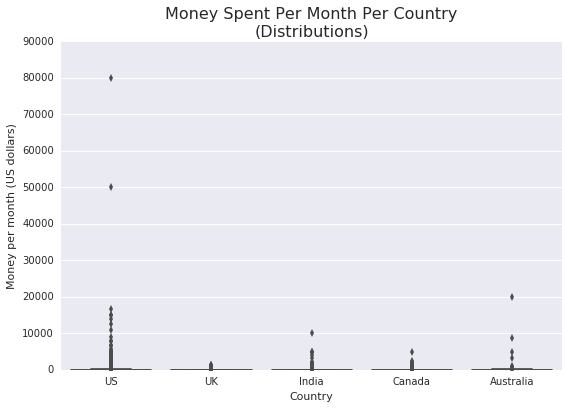

In [16]:
import seaborn as sns
filt = fcc_survey['CountryLive'].str.contains('Australia|United States of America|India|Canada|United Kingdom')
required = fcc_survey[filt] # returns data of only countries we are interested in
sns.boxplot(data=required, x='CountryLive', y='money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.ylim(0,90000)
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada', 'Australia']) # avoids tick labels overlap
plt.show()

From our boxplot, we see that there is an extreme outlier for the US, with monthly spend of more than `$20,000`. This amount is very unlikely. Also for Australia there is an outlier of `$20,000`. We are going to get rid of these outliers and recompute the average monthly spend.

In [17]:
fcc_survey = fcc_survey[fcc_survey['money_per_month'] < 20000]

In [18]:
#groups the data by country and returns a dataframe
country_grp = fcc_survey.groupby('CountryLive')
country_mean_amount = pd.DataFrame({'mean_amount':country_grp['money_per_month'].mean()}).reset_index()

#getting our country of interest
interest_countries = country_mean_amount[(country_mean_amount['CountryLive'] == 'United States of America')
                                         | (country_mean_amount['CountryLive'] == 'India')
                                         | (country_mean_amount['CountryLive'] == 'United Kingdom')
                                         | (country_mean_amount['CountryLive'] == 'Canada')
                                         | (country_mean_amount['CountryLive'] == 'Australia')]

In [19]:
interest_countries

,CountryLive,mean_amount
6,Australia,225.399823
19,Canada,113.510961
52,India,135.100982
121,United Kingdom,45.534443
122,United States of America,183.800110


After getting rid of the outliers, the average amount spent has dropped for both the United States and Australia. We are goig to generate another boxplot to identify more outlier data

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



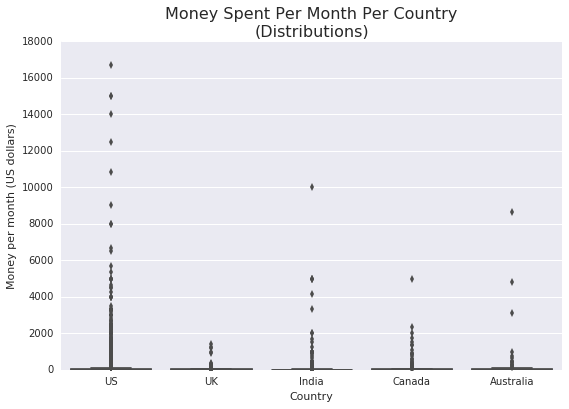

In [20]:
filt = fcc_survey['CountryLive'].str.contains('Australia|United States of America|India|Canada|United Kingdom')
required = fcc_survey[filt] # returns data of only countries we are interested in
sns.boxplot(data=required, x='CountryLive', y='money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada', 'Australia']) # avoids tick labels overlap
plt.show()

From our newly generated boxplot, we can see that any amount above `$2,000` in India is an outlier. We will also treat amounts above `$2,000` as outliers in Australia too. One way to justify that amount is to find out if participants who paid over `$2,000` attended bootcamps, as bootcamps tend to be quite expensive.

## Checking Bootcamp Attendance.

In [21]:
filt = (required['CountryLive'] == 'India') & (required['money_per_month'] > 2000)
india_outlier = required[filt]
india_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'money_per_month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,money_per_month
1728,India,0.0,NaN,20000.0,4.0,5000.000000
1755,India,0.0,NaN,50000.0,15.0,3333.333333
7989,India,0.0,NaN,5000.0,1.0,5000.000000
8126,India,0.0,NaN,5000.0,1.0,5000.000000
13398,India,0.0,NaN,20000.0,2.0,10000.000000
15587,India,0.0,NaN,100000.0,24.0,4166.666667


After lookinng at the outlier data for India, we can see that none of the outlier amount came from participants who attended bootcamps. So we are going to drop those rows.

In [22]:
required = required.drop(india_outlier.index) # removes every row with the same index as india_outlier 

In [23]:
filt = (required['CountryLive'] == 'Australia') & (required['money_per_month'] > 2000)
australia_outlier = required[filt]
australia_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'money_per_month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,money_per_month
88,Australia,1.0,Codemaster Institute,9600.0,2.0,4800.000000
3931,Australia,1.0,Coder Factory,26000.0,3.0,8666.666667
12810,Australia,1.0,Coder Factory,25000.0,8.0,3125.000000


In [24]:
required = required.drop(australia_outlier.index) # removes every row with the same index as australia_outlier

Despite the outlier data for Australia coming from those who attended bootcamps, none of the prices are representative of the average monthly price for a coding bootcamp and so the outlier rows for Australia were dropped.

In [25]:
filt = (required['CountryLive'] == 'United States of America') & (required['money_per_month'] > 6000)
us_outlier = required[filt]
us_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'money_per_month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,money_per_month
718,United States of America,1.0,The Coding Boot Camp at UCLA Extension,8000.0,1.0,8000.000000
1222,United States of America,1.0,The Iron Yard,13000.0,2.0,6500.000000
3184,United States of America,1.0,We Can Code IT,9000.0,1.0,9000.000000
3930,United States of America,0.0,NaN,65000.0,6.0,10833.333333
6805,United States of America,1.0,Sabio.la,15000.0,1.0,15000.000000
7198,United States of America,0.0,NaN,70000.0,5.0,14000.000000
7505,United States of America,1.0,Codeup,20000.0,3.0,6666.666667
9778,United States of America,1.0,Grand Circus,8000.0,1.0,8000.000000
16650,United States of America,0.0,NaN,200000.0,12.0,16666.666667
16997,United States of America,0.0,NaN,12500.0,1.0,12500.000000


In [26]:
required = required.drop(us_outlier.index) # removes every row with the same index as us_outlier

Out of the 11 outlier data from the US, 6 of them came from participants who attended bootcamps. Like Australia, we aslo had to drop every outlier data from the US because data from those who attended bootcamps isn't representative of the average monthly cost of a bootcamp.

In [27]:
filt = (required['CountryLive'] == 'Canada') & (required['money_per_month'] > 4000)
canada_outlier = required[filt]
canada_outlier[['CountryLive', 'AttendedBootcamp', 'BootcampName',
               'MoneyForLearning', 'MonthsProgramming', 'money_per_month']]

,CountryLive,AttendedBootcamp,BootcampName,MoneyForLearning,MonthsProgramming,money_per_month
13659,Canada,1.0,Bloc.io,10000.0,2.0,5000.0


In [28]:
required = required.drop(canada_outlier.index) # removes every row with the same index as canada_outlier

We will also be dropping the outlier data from Canada for the same reason as the US and Australia.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



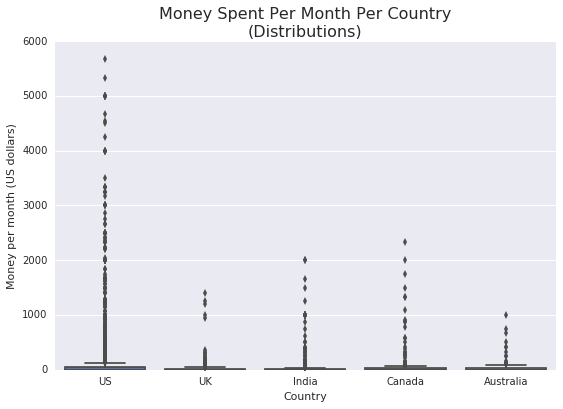

In [29]:
sns.boxplot(data=required, x='CountryLive', y='money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(5), ['US', 'UK', 'India', 'Canada', 'Australia']) # avoids tick labels overlap
plt.show()

In [30]:
#groups our data by countries and returns the mean amount spnt
interest_grp = required.groupby('CountryLive')
interest_mean_amount = pd.DataFrame({'mean_amount':interest_grp['money_per_month'].mean()}).reset_index()
interest_mean_amount['mean_amount'] = round(interest_mean_amount['mean_amount'], 2)
interest_mean_amount.sort_values('mean_amount', ascending=False)

,CountryLive,mean_amount
4,United States of America,142.65
1,Canada,93.07
2,India,65.76
0,Australia,63.00
3,United Kingdom,45.53


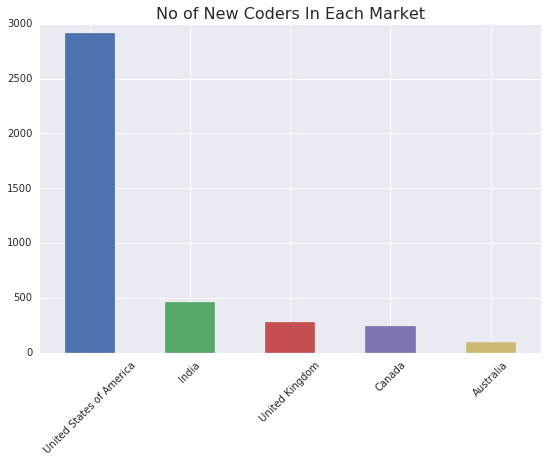

In [31]:
#Visualising the amount of new coders in our required market
required['CountryLive'].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.title('No of New Coders In Each Market',
         size=16)
plt.show()

4 out of the 5 markets we analysed are on average likely to meet our subscription demand of `$59`.
Our best market to advertsise in is clearly the US, not only is the country with the most amount of new coders, coders in the US tend to spend the most money monthly on average. We need to decide on a second market and for me, that'll be India. Despite the average monthly spend being higher in Canada, the amount of new coders in India tilts it in a favourable direction and I also think this number will continue to grow exponentially each year. Coders in Australia also tend to spend above `$59` but we won't be running an ad in that market since the amount of new coders there is considerably less than that of the other markets. The two markets I'll suggest we run ads on are the United States and India.

## Conclusion:
We set out to find the best markets to advertise our product in and we were able to answer that question. To ensure that we gave a fairly accurate answer, we made sure that our sample data was representative of our population.

The answers we arrived at are:

* The US is the best market to advertise in, not only is there a huge amount of new coders there, the new coders there spend more than twice our monthly subscription fee on average each month.

* While I have picked India over Canada as our second market based off the number of potential customers there, It is worthwhile to explore Canada as a market and so that will be left to the marketing team to decide upon.
* Neither the United Kingdom nor Australia seem to be good markets to run ads on. The average monthly spend in the UK is considerably lower than our subscription fee and the amount of new coders in australia is relatively low compared to the other markets.